In [1]:
import numpy as np
import choix
import opt_fair
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from matplotlib import colors

In [2]:
size = 100 #number of items
min_size = 30 
maj_size = size - min_size
num_reviewers = 10 #number of reviewers
pair_per_reviewer = 300 #number of pairs evaluated per reviewer

In [3]:
#init original scores
np.random.seed(40)
maxv=   5
minv=  -5
original = np.random.uniform(minv,maxv ,size = size); #print(original)
bias = 2

#original[0:(maj_size)] = original[0:(maj_size)] - np.mean(original[0:(maj_size)])
#original[(maj_size):size] = original[(maj_size):size] - np.mean(original[(maj_size):size])
#init classes
classes = [0] * maj_size + [1] * min_size

In [4]:
%%time
np.random.seed(40)
max_iters=100

num_revs = [320,160,80,40,20,10]
pairs_per_reviewer = [10,20,40,80,160,320]
annot_bt = np.zeros((len(num_revs),len(pairs_per_reviewer)))

for i,revs in enumerate(num_revs):
    for j,pairs in enumerate(pairs_per_reviewer):
        
    
        revs_bias = [2]*revs
        biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
        revs_set =  opt_fair._create_pc_set_for_reviewers(biased_scores,pairs)

        pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
        annot_bt_temp,annot_bias =  opt_fair._alternate_optim(size, revs, pc_with_revs, iters = max_iters)
        annot_bt[i,j],x = stats.kendalltau(annot_bt_temp,original)
        print(annot_bt[i,j])

0.827878787878788
0.8416161616161618
0.9058585858585859
0.9317171717171718
0.9555555555555557
0.9551515151515152
0.8165656565656567
0.8545454545454546
0.9171717171717173
0.9284848484848486
0.9486868686868689
0.9600000000000002
0.7430303030303032
0.8404040404040406
0.8836363636363638
0.9131313131313133
0.9317171717171718
0.9385858585858587
0.66989898989899
0.7882828282828284
0.8533333333333334
0.9010101010101011
0.9078787878787881
0.9292929292929295
0.6088714031366704
0.7026262626262627
0.8044444444444446
0.8359595959595961
0.9002020202020203
0.9034343434343436
0.4591782566876222
0.5505606655024653
0.661818181818182
0.772929292929293
0.8541414141414143
0.894949494949495
CPU times: user 54min 31s, sys: 23min 11s, total: 1h 17min 43s
Wall time: 30min 17s


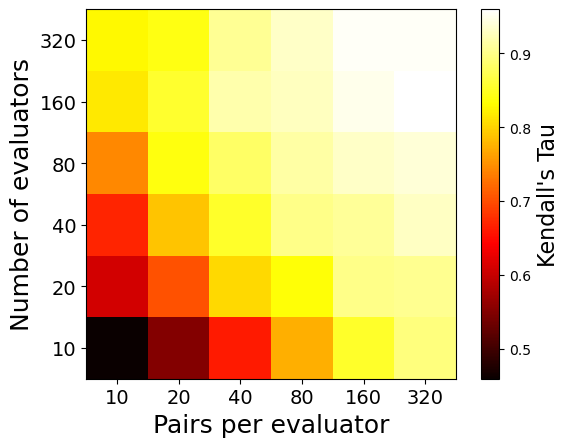

In [6]:
plt.imshow(annot_bt, cmap='hot')
cbar = plt.colorbar()
cbar.set_label("Kendall's Tau", fontsize=16)
plt.xticks(range(len(pairs_per_reviewer)), pairs_per_reviewer)
plt.yticks(range(len(num_revs)), num_revs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Pairs per evaluator', fontsize=18)
plt.ylabel('Number of evaluators', fontsize=18)
plt.savefig("../plots/number_of_comparisons_40_40.pdf", bbox_inches="tight")
plt.show()

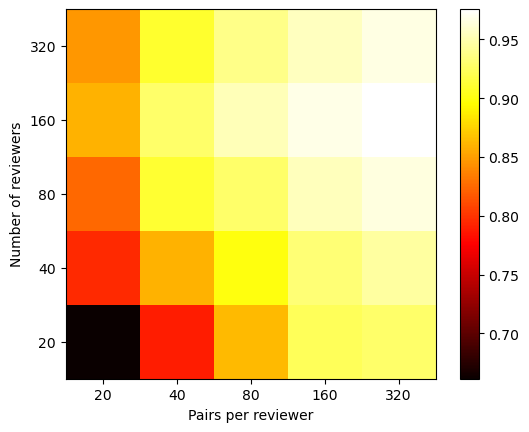

In [9]:
qq = 1 
plt.imshow(annot_bt[:-qq,qq:], cmap='hot')
plt.colorbar()
plt.xticks(range(len(pairs_per_reviewer)-qq), pairs_per_reviewer[qq:])
plt.yticks(range(len(num_revs)-qq), num_revs[:-qq])
plt.xlabel('Pairs per reviewer')
plt.ylabel('Number of reviewers')
plt.show()